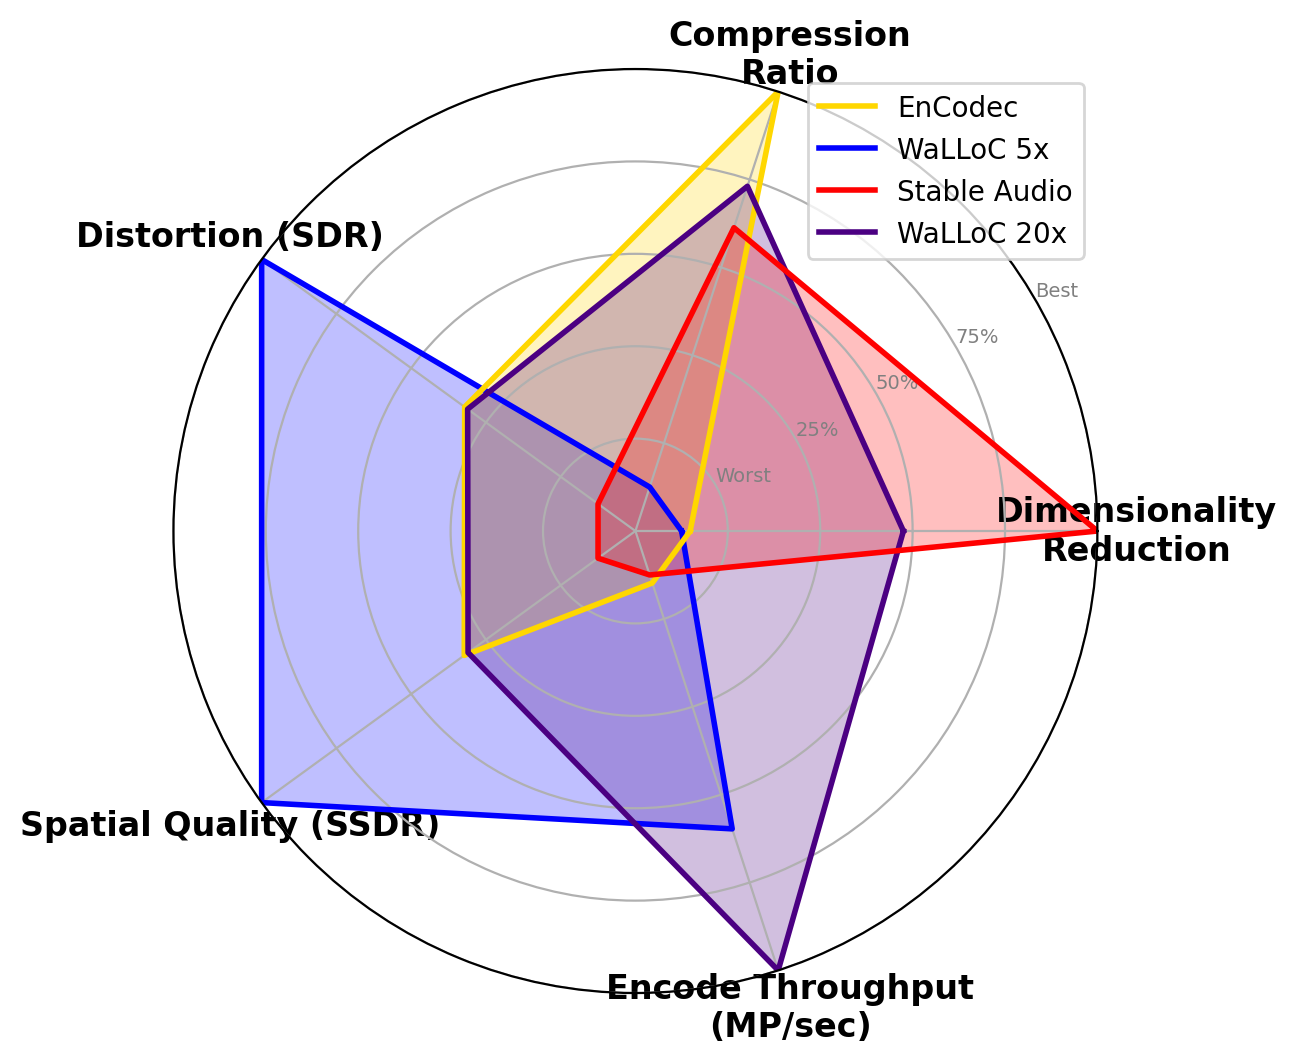

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
data = {
    'Name': ['WaLLoC 5x', 'EnCodec', 'WaLLoC 20x', 'Stable Audio'],
    'DR': np.log10([4.74, 5, 19, 64]),
    'CR': np.log10([21.3, 114, 76.3, 64]),
    'Enc': [77.8, 2.75, 121, 0.308],
    'Dec': [11.2, 3.03, 12.2, 0.3],
    'PSNR': [39, 32, 33.3, 28.4],
    'SSDR': [33.3, 22.7, 22.5, 15.7],
    'SRDR': [13.9, 6.69, 8.06, 2.03],
    'CDPAM': [41.1, 47.4, 36.6, 49.7]
}

df = pd.DataFrame(data)

# Calculate Total SDR using the provided formula
df['Total_SDR'] = 10 * np.log10(10 ** (df['SSDR'] / 10) + 10 ** (df['SRDR'] / 10)) - 10 * np.log10(2)

# Metrics to include
metrics = ['DR', 'CR', 'Total_SDR', 'SSDR', 'Enc',]

# Normalize data
normalized_data = {}
for metric in metrics:
    min_val = df[metric].min()
    max_val = df[metric].max()
    # Normalize between 0.1 and 1 to give minimum a non-zero radius
    norm = (df[metric] - min_val) / (max_val - min_val)
    norm = norm * 0.9 + 0.1  # Scale to range [0.1, 1]
    normalized_data[metric] = norm

# Create DataFrame of normalized data
norm_df = pd.DataFrame(normalized_data)
norm_df['Name'] = df['Name']

# Number of variables we're plotting
num_vars = len(metrics)

# Compute angle of each axis in the plot (divide plot / number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Complete the loop
angles += angles[:1]

# Metric labels
metric_labels = [
    'Dimensionality\nReduction',
    'Compression\nRatio',
    'Distortion (SDR)',
    'Spatial Quality (SSDR)',
    'Encode Throughput\n(MP/sec)',
]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=200)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], metric_labels, fontsize=12, fontweight='bold')

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks(
    [0.2, 0.4, 0.6, 0.8, 1.0],
    ["Worst", "25%", "50%", "75%", "Best"],
    color="grey",
    size=7
)
plt.ylim(0, 1)

# Define colors for each codec
colors = {
    'WaLLoC 5x': 'blue',
    'WaLLoC 20x': 'indigo',
    'EnCodec': 'gold',
    'Stable Audio': 'red',
}

# Plot data
for i, row in norm_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Repeat first value to close the loop
    ax.plot(
        angles,
        values,
        color=colors[row['Name']],
        linewidth=2,
        linestyle='solid',
        label=row['Name']
    )
    ax.fill(
        angles,
        values,
        color=colors[row['Name']],
        alpha=0.25
    )

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

handles, labels = plt.gca().get_legend_handles_labels()

# Reordering the handles and labels as desired: 2,1,4,3
order = [1, 0, 3, 2]

# Adding legend with reordered handles and labels
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Show the plot
plt.show()
fig.savefig("radar_audio.svg")
